In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import torch
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm
import os
import sys

# Add the directory containing `pokie.py` to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

# Import pokie from pokie.py
from pokie import pokie

In [2]:
# # Plotting code
# def not_normalized_plot(results, name):
#     # Create a figure with two subplots
#     fig, axs = plt.subplots(figsize=(20, 10))
#     plt.rcParams.update({'font.size': 30})
#     # Increase x tick size
#     plt.xticks(fontsize=40)
#     # Increase y tick size
#     plt.yticks(fontsize=40)
#     l_values = np.linspace(0, len(results) - 1, len(results))
#     l_values = np.array(l_values)
#     plt.plot(l_values, results, 'o-', label='Probability', markersize=20)
#     # plt.errorbar(l_values, average_total_probabilities, yerr=std_total_probabilities, fmt='o', label='Probability', markersize=20) 
#     # Plot Horizontal line at 0.5 and 0.6
#     # plt.axhline(y=0.5, color='r', linestyle='--', label='0.5')
#     # plt.axhline(y=0.6, color='g', linestyle='--', label='0.6')
#     plt.xlabel("Posteriors", fontsize=50)
#     plt.ylabel("Probability ", fontsize=50)
#     plt.title(f"{name}", fontsize = 50)
#     # X axis are only 0, 1, 2, 3
#     plt.xticks(l_values)

#     # Adjust layout to prevent overlap
#     plt.tight_layout()

#     # Show the plot
#     plt.show()

# def normalized_plot(results, name):
#     # Create a figure with two subplots
#     fig, axs = plt.subplots(figsize=(20, 10))
#     plt.rcParams.update({'font.size': 30})
#     # Increase x tick size
#     plt.xticks(fontsize=40)
#     # Increase y tick size
#     plt.yticks(fontsize=40)
#     l_values = np.linspace(0, len(results) - 1, len(results))
#     l_values = np.array(l_values)
#     plt.plot(l_values, results, 'o-', label='Probability', markersize=20)
#     plt.xlabel("Posteriors", fontsize=50)
#     plt.ylabel("Probability ", fontsize=50)
#     plt.title(f"Model Probability ", fontsize = 50)
#     # X axis are only 0, 1, 2, 3
#     plt.xticks(l_values)

#     # Adjust layout to prevent overlap
#     plt.tight_layout()

#     # Show the plot
#     plt.show()


def plot_pokie(results, name):
    # Create a figure with two subplots
    fig, axs = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 30})
    # Increase x tick size
    plt.xticks(fontsize=40)
    # Increase y tick size
    plt.yticks(fontsize=40)
    l_values = np.linspace(0, len(results) - 1, len(results))
    l_values = np.array(l_values)
    plt.plot(l_values, results, 'o-', label='Probability', markersize=20)
    # plt.errorbar(l_values, average_total_probabilities, yerr=std_total_probabilities, fmt='o', label='Probability', markersize=20) 
    # Plot Horizontal line at 0.5 and 0.6
    # plt.axhline(y=0.5, color='r', linestyle='--', label='0.5')
    # plt.axhline(y=0.6, color='g', linestyle='--', label='0.6')
    plt.xlabel("Posteriors", fontsize=50)
    plt.ylabel("Probability ", fontsize=50)
    plt.title(f"{name}", fontsize = 50)
    # X axis are only 0, 1, 2, 3
    plt.xticks(l_values)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

In [3]:
# load in the .pt files in Downloads/samples
truth = torch.load('/Users/sammysharief/Downloads/samples/true.pt', map_location=torch.device('cpu'))
posterior4 = torch.load('/Users/sammysharief/Downloads/samples/posterior4.pt', map_location=torch.device('cpu'))
posterior3 = torch.load('/Users/sammysharief/Downloads/samples/posterior3.pt', map_location=torch.device('cpu'))
posterior2 = torch.load('/Users/sammysharief/Downloads/samples/posterior2.pt', map_location=torch.device('cpu'))
posterior1 = torch.load('/Users/sammysharief/Downloads/samples/posterior1.pt', map_location=torch.device('cpu'))
posterior0 = torch.load('/Users/sammysharief/Downloads/samples/posterior0.pt', map_location=torch.device('cpu'))
observations = torch.load('/Users/sammysharief/Downloads/samples/observations.pt', map_location=torch.device('cpu'))

In [4]:
x_obs = truth
y_obs = observations
post_samp0 = posterior0
post_samp1 = posterior1
post_samp2 = posterior2
post_samp3 = posterior3

# Find max and min for truth, posterior4, posterior3, posterior2, posterior1, posterior0, observations
truth_max = torch.max(truth)
truth_min = torch.min(truth)

posterior4_max = torch.max(posterior4)
posterior4_min = torch.min(posterior4)

posterior3_max = torch.max(posterior3)
posterior3_min = torch.min(posterior3)

posterior2_max = torch.max(posterior2)
posterior2_min = torch.min(posterior2)

posterior1_max = torch.max(posterior1)
posterior1_min = torch.min(posterior1)

posterior0_max = torch.max(posterior0)
posterior0_min = torch.min(posterior0)

observations_max = torch.max(observations)
observations_min = torch.min(observations)

# Identify the max and min of all the data
max_data = truth_max
min_data = truth_min

# Normalize the data based on max_data and min_data
truth = (truth - min_data) / (max_data - min_data)
posterior4 = (posterior4 - min_data) / (max_data - min_data + 1e-10)
posterior3 = (posterior3 - min_data) / (max_data - min_data + 1e-10)
posterior2 = (posterior2 - min_data) / (max_data - min_data + 1e-10)
posterior1 = (posterior1 - min_data) / (max_data - min_data + 1e-10)
posterior0 = (posterior0 - min_data) / (max_data - min_data + 1e-10)

print(f'Truth max: {torch.max(truth)} and min: {torch.min(truth)}')
print(f'Posterior4 max: {torch.max(posterior4)} and min: {torch.min(posterior4)}')
print(f'Posterior3 max: {torch.max(posterior3)} and min: {torch.min(posterior3)}')
print(f'Posterior2 max: {torch.max(posterior2)} and min: {torch.min(posterior2)}')
print(f'Posterior1 max: {torch.max(posterior1)} and min: {torch.min(posterior1)}')
print(f'Posterior0 max: {torch.max(posterior0)} and min: {torch.min(posterior0)}')

# Reshape the Truth 
truth = truth.reshape(16, 64 * 64 * 3)

# Reshape all posteriors from 16,3,64,64 to 16,64,3x64x64
posterior3_reshape = posterior3.reshape(16, 64, 64 * 64 * 3)
posterior2_reshape = posterior2.reshape(16, 64, 64 * 64 * 3)
posterior1_reshape = posterior1.reshape(16, 64, 64 * 64 * 3)
posterior0_reshape = posterior0.reshape(16, 64, 64 * 64 * 3)

# Make truth, posterior0, posterior1, posterior2, posterior3, posterior4, observations into numpy arrays
truth = truth.numpy()
posterior3_reshape = posterior3_reshape.numpy()
posterior2_reshape = posterior2_reshape.numpy()
posterior1_reshape = posterior1_reshape.numpy()
posterior0_reshape = posterior0_reshape.numpy()

Truth max: 1.0 and min: 0.0
Posterior4 max: 0.8527698516845703 and min: -0.010756193660199642
Posterior3 max: 0.771514356136322 and min: -0.006224202457815409
Posterior2 max: 0.6889628767967224 and min: -0.0005897657829336822
Posterior1 max: 1.0044115781784058 and min: -0.013637484982609749
Posterior0 max: 1.038083791732788 and min: -2.8896414733026177e-05


100%|██████████| 100/100 [00:09<00:00, 10.62it/s]


Shape of total_probability: (100, 4)
Results: [0.29166375 0.25641586 0.2326798  0.21924059]
Calibration: [0.65170898 0.57294922 0.51991211 0.48988281]


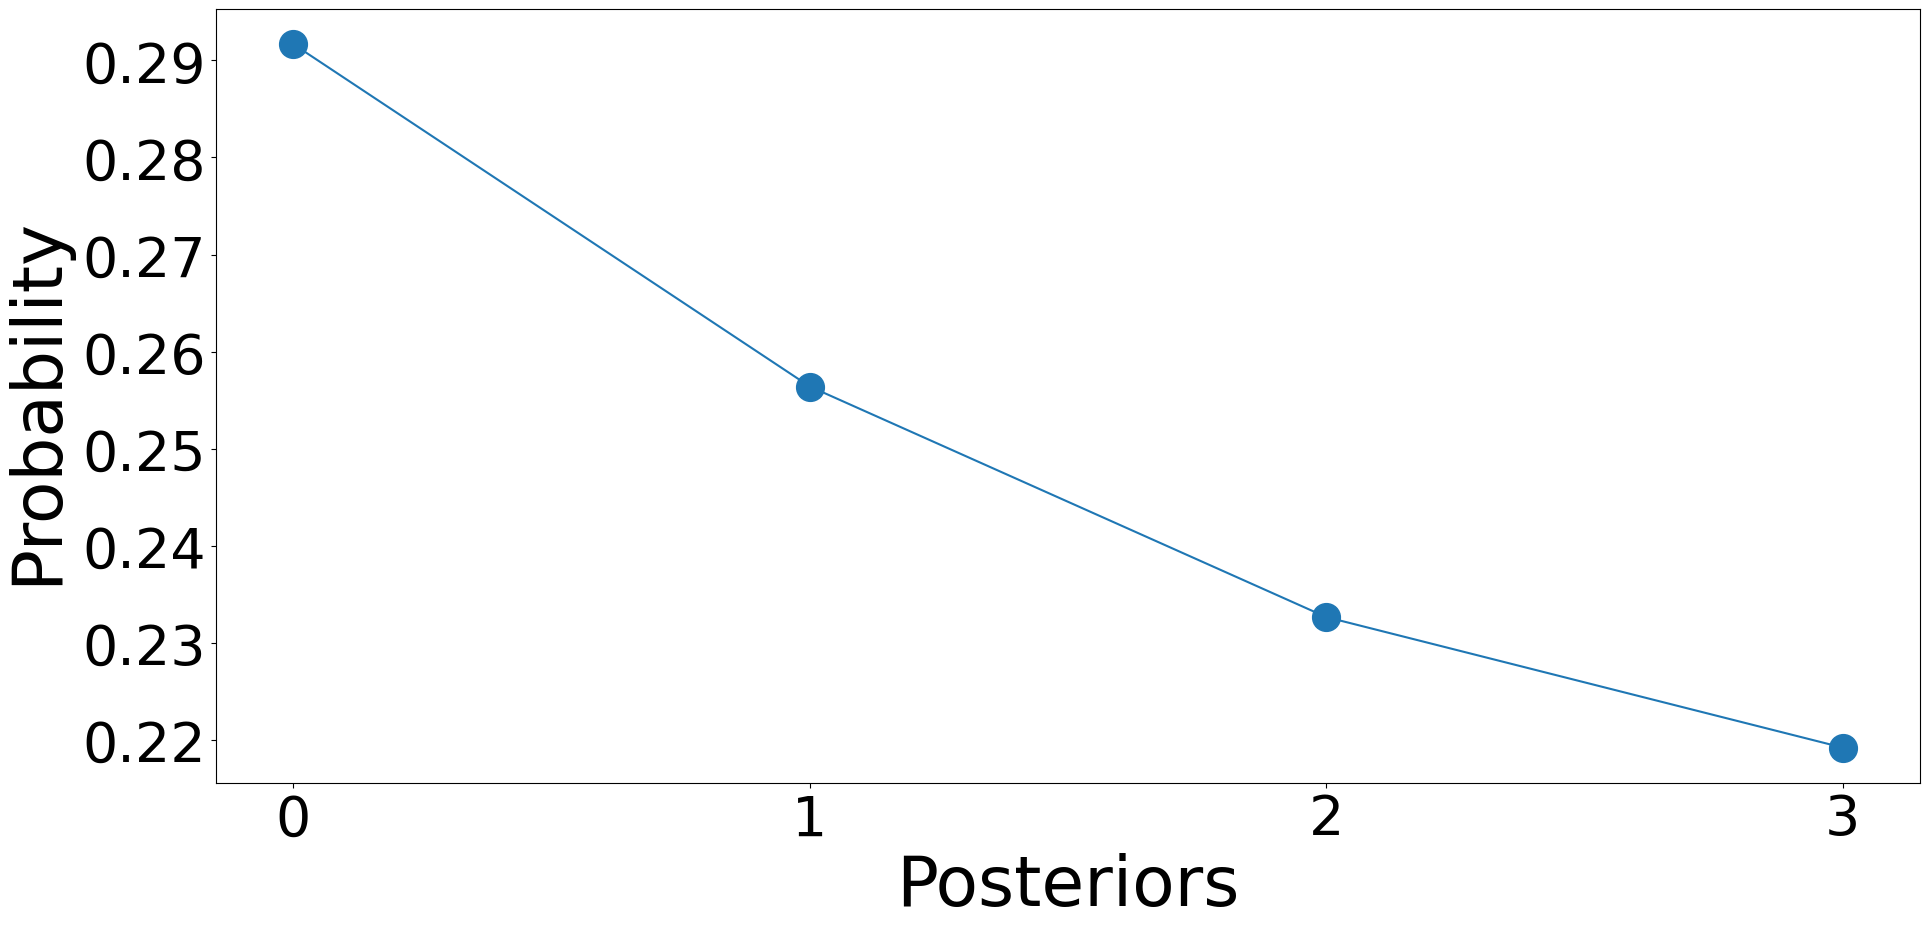

1.0


In [5]:
posterior = [posterior0_reshape, posterior1_reshape, posterior2_reshape, posterior3_reshape]
posterior = np.array(posterior)
results, calibrated = pokie(truth, posterior, num_runs=100)
print(f'Results: {results}')
print(f'Calibration: {calibrated}')

plot_pokie(results, name = '')
print(np.sum(np.array(results)))

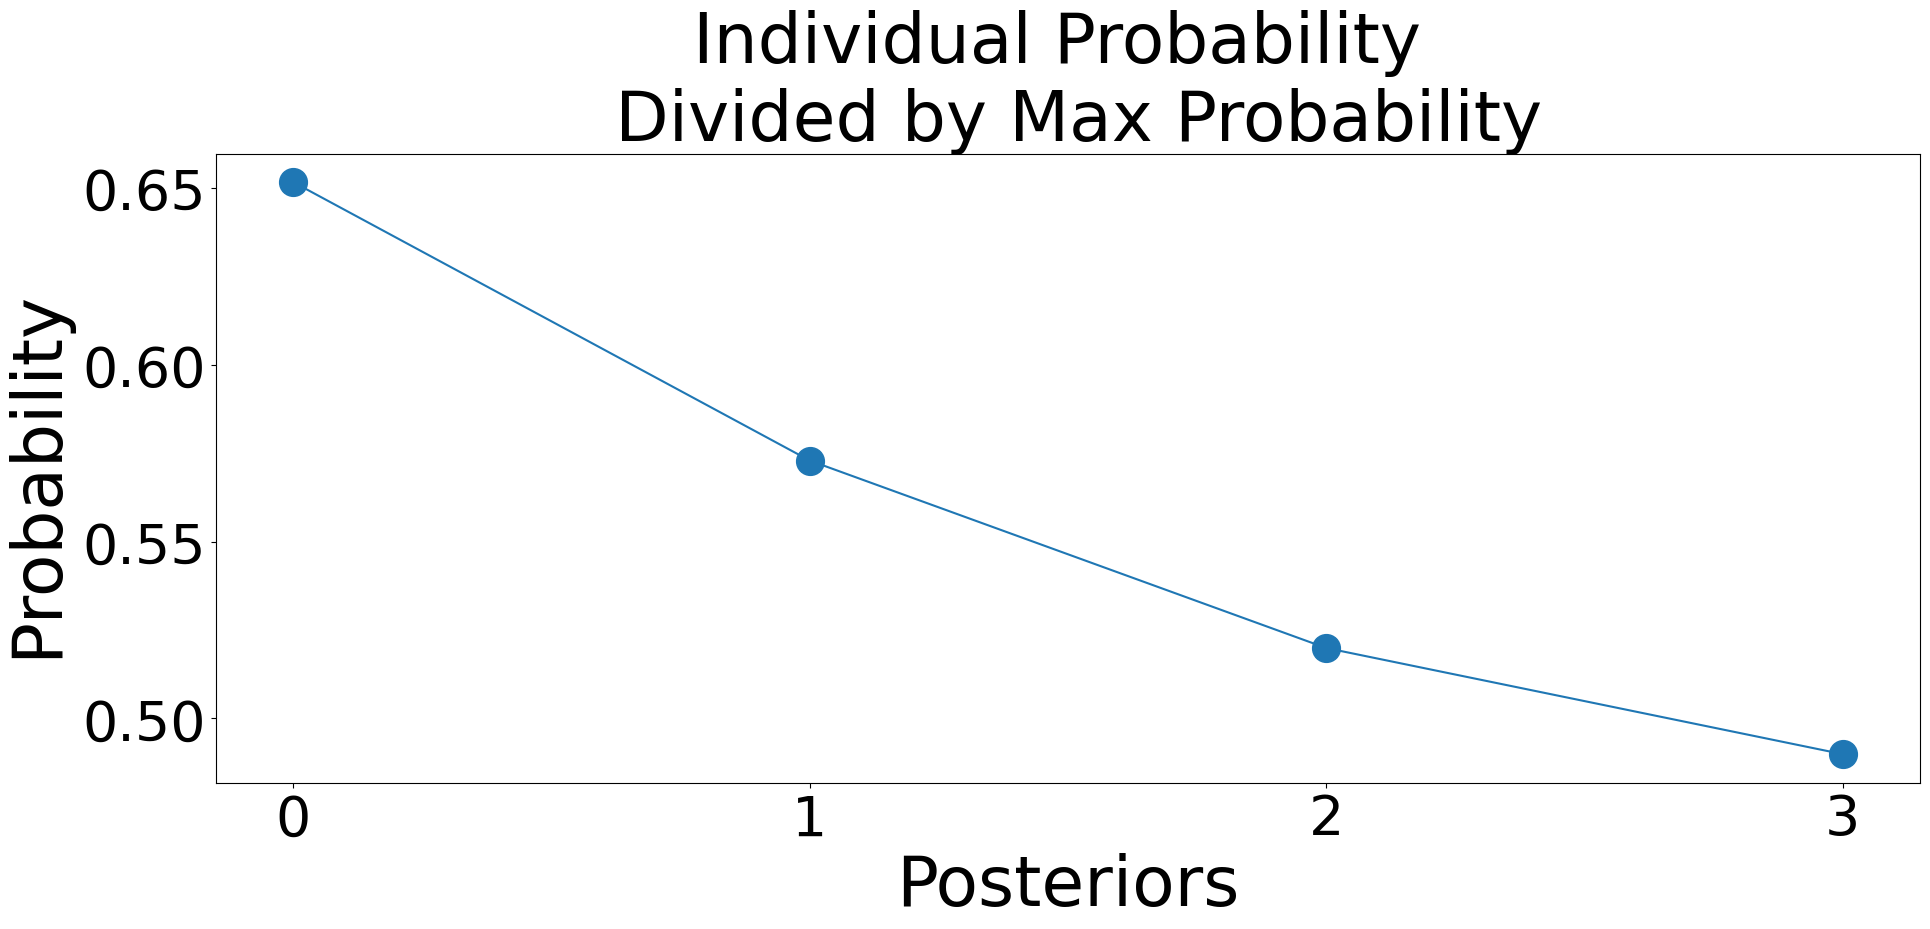

In [6]:
plot_pokie(calibrated, name = 'Individual Probability \n Divided by Max Probability')

100%|██████████| 100/100 [00:01<00:00, 51.56it/s]


Results: [0.64023077]


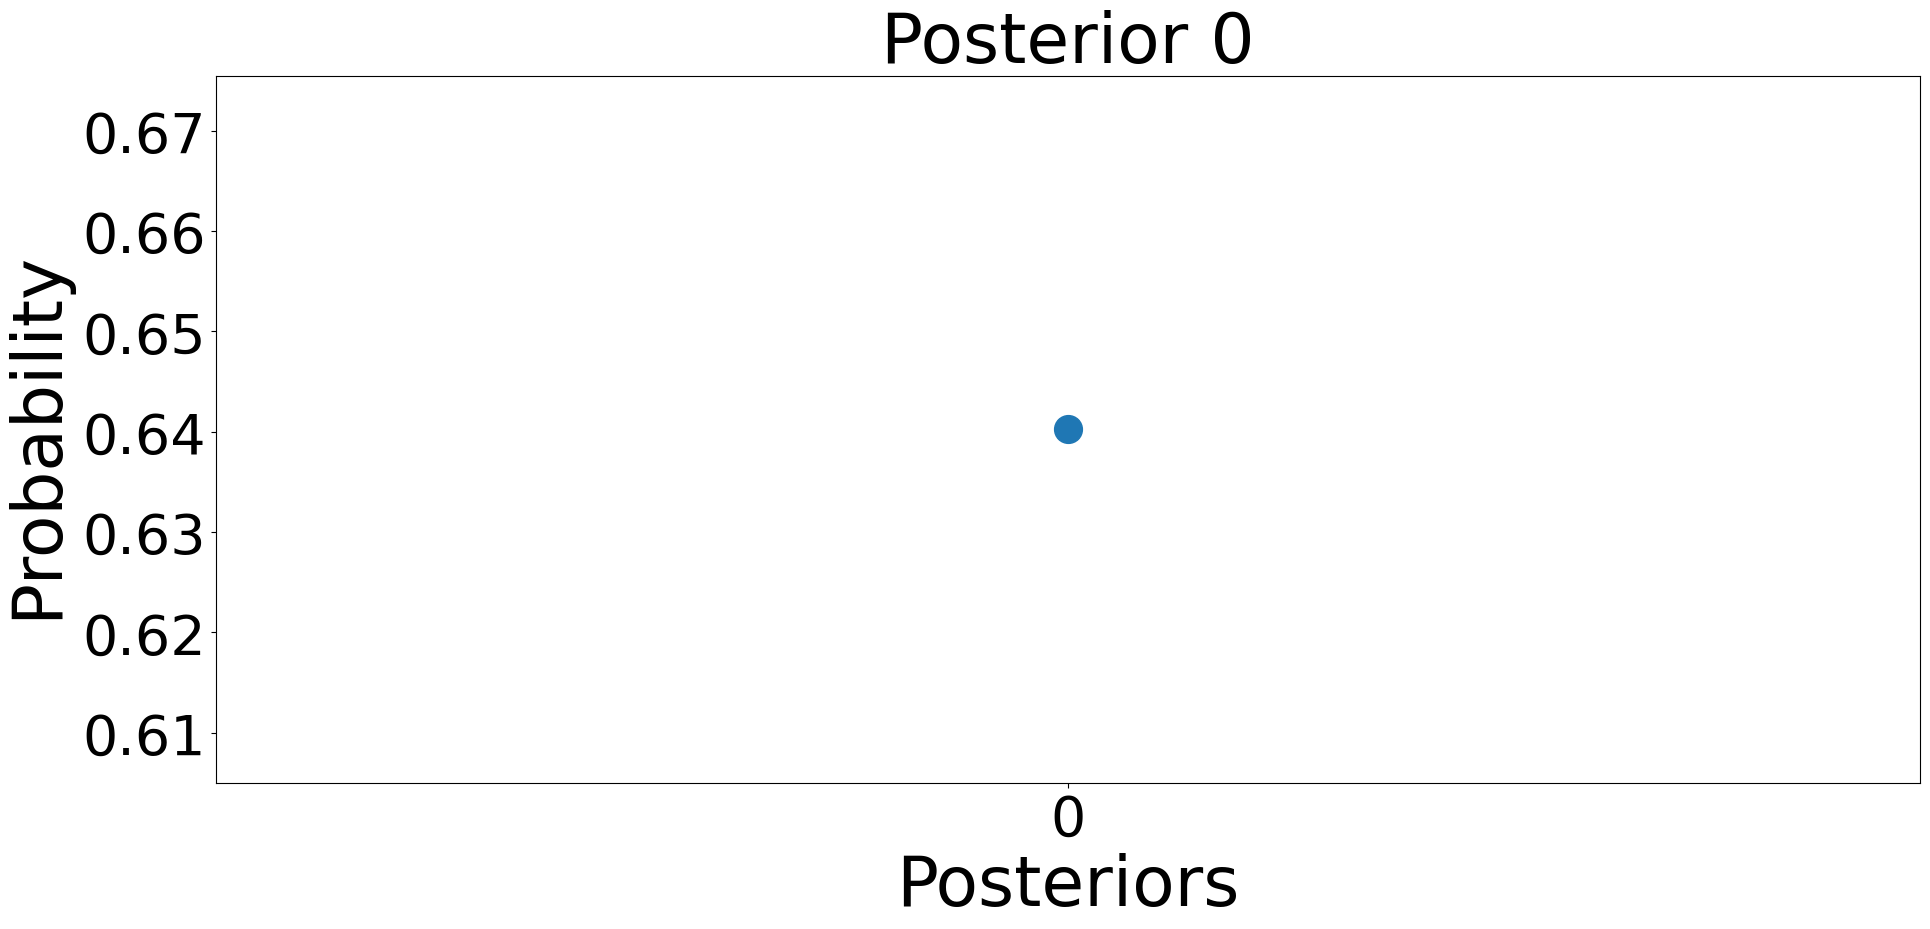

In [7]:
posterior = [posterior0_reshape]
posterior = np.array(posterior)
results, _ = pokie(truth, posterior, num_runs=100)
print(f'Results: {results}')

plot_pokie(results, name='Posterior 0')

100%|██████████| 100/100 [00:02<00:00, 49.50it/s]


Results: [0.56769231]


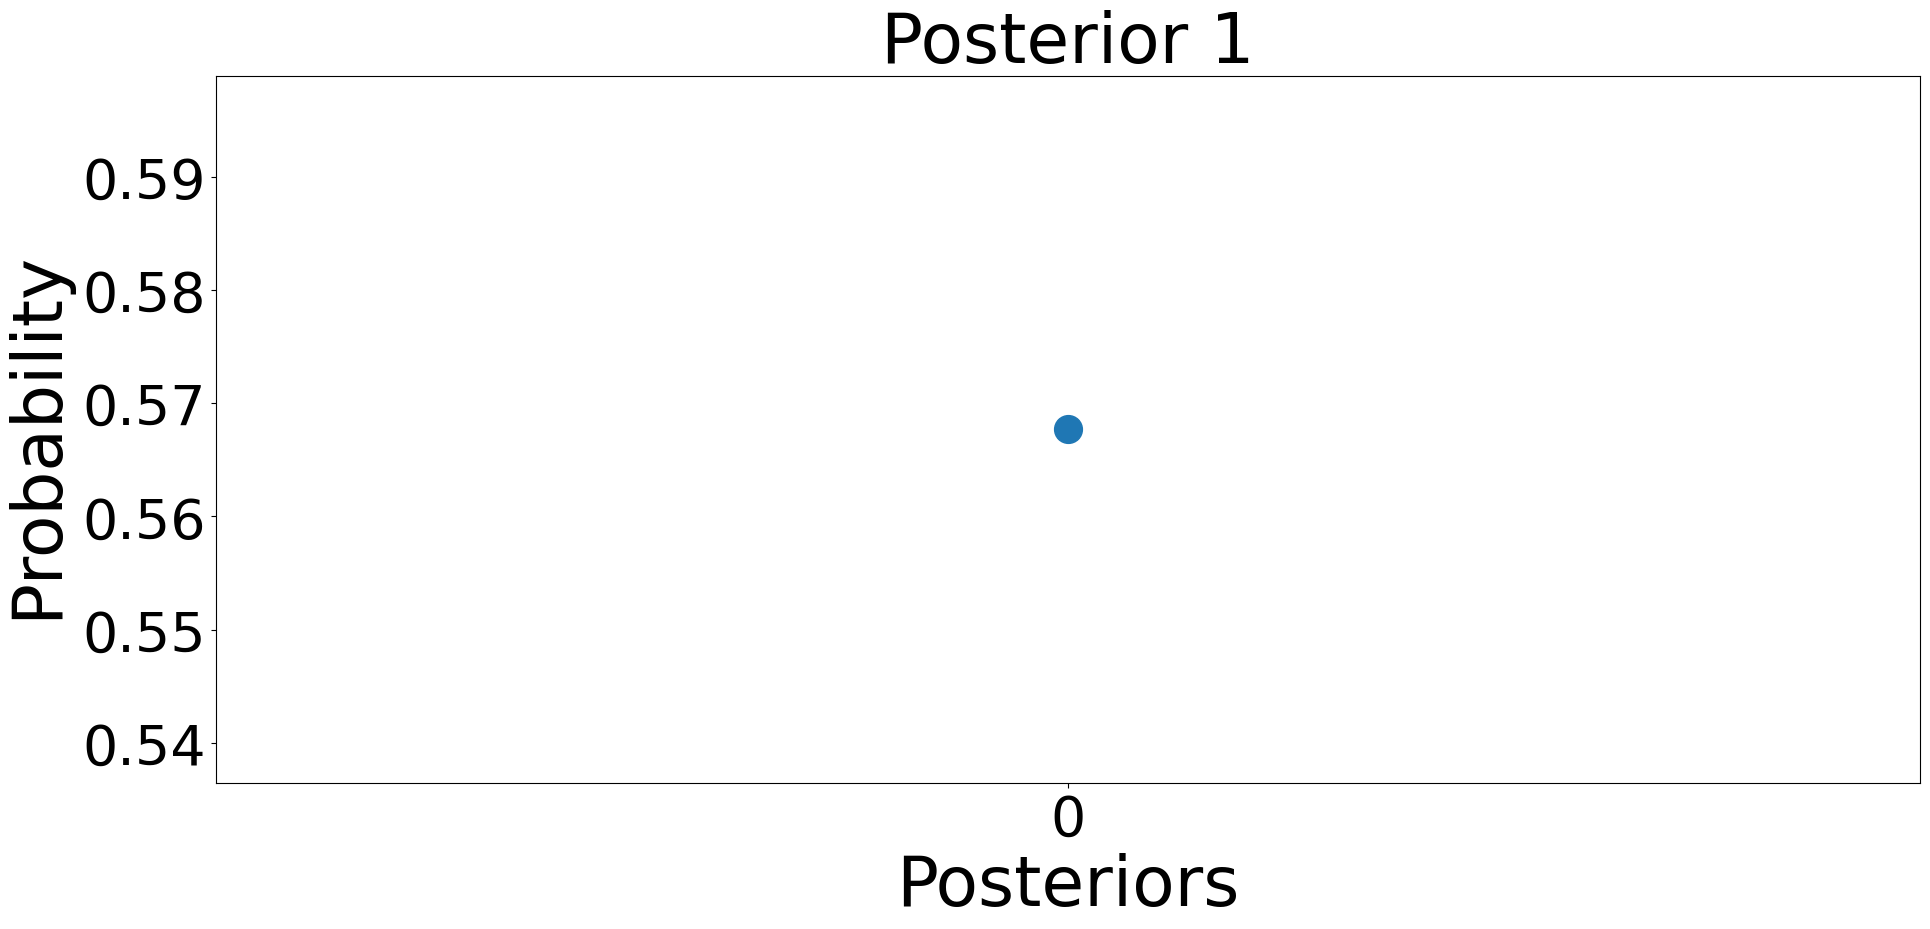

In [8]:
posterior = [posterior1_reshape]
posterior = np.array(posterior)
results, _  = pokie(truth, posterior, num_runs=100)
print(f'Results: {results}')

plot_pokie(results, name='Posterior 1')

100%|██████████| 100/100 [00:01<00:00, 56.48it/s]


Results: [0.50933654]


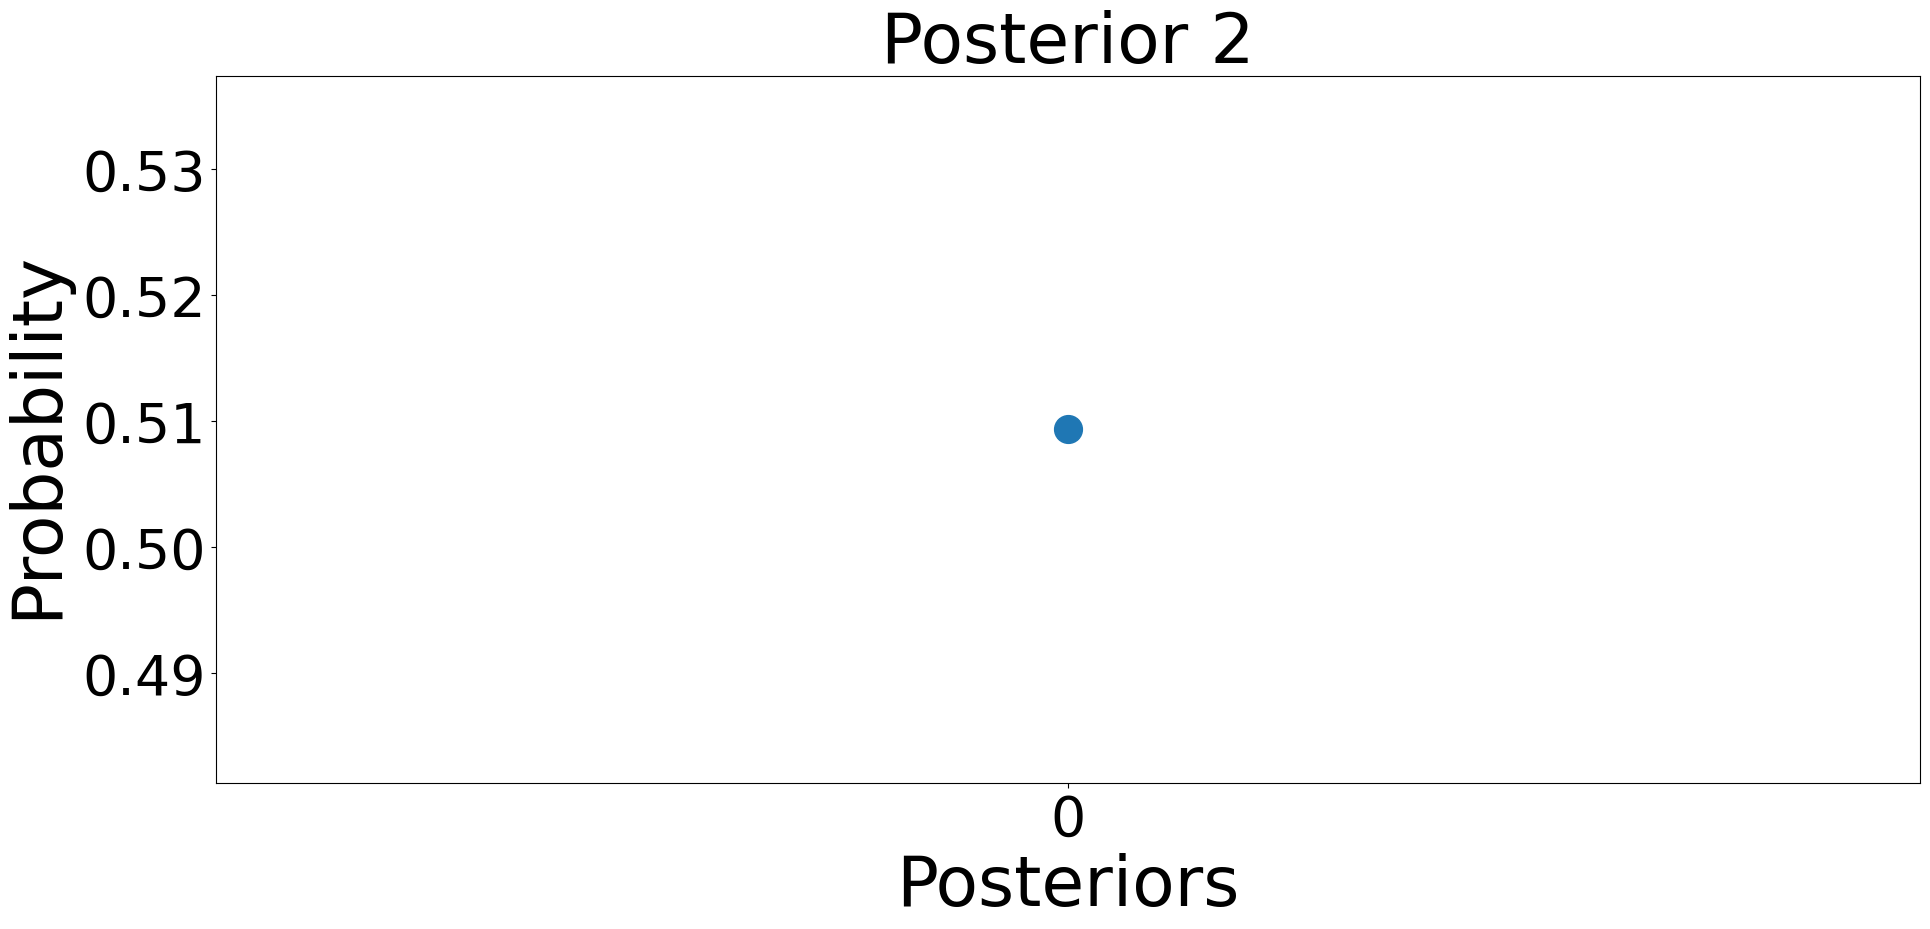

In [9]:
posterior = [posterior2_reshape]
posterior = np.array(posterior)
results, _  = pokie(truth, posterior, num_runs=100)
print(f'Results: {results}')

plot_pokie(results, name='Posterior 2')

100%|██████████| 100/100 [00:01<00:00, 55.85it/s]


Results: [0.49448077]


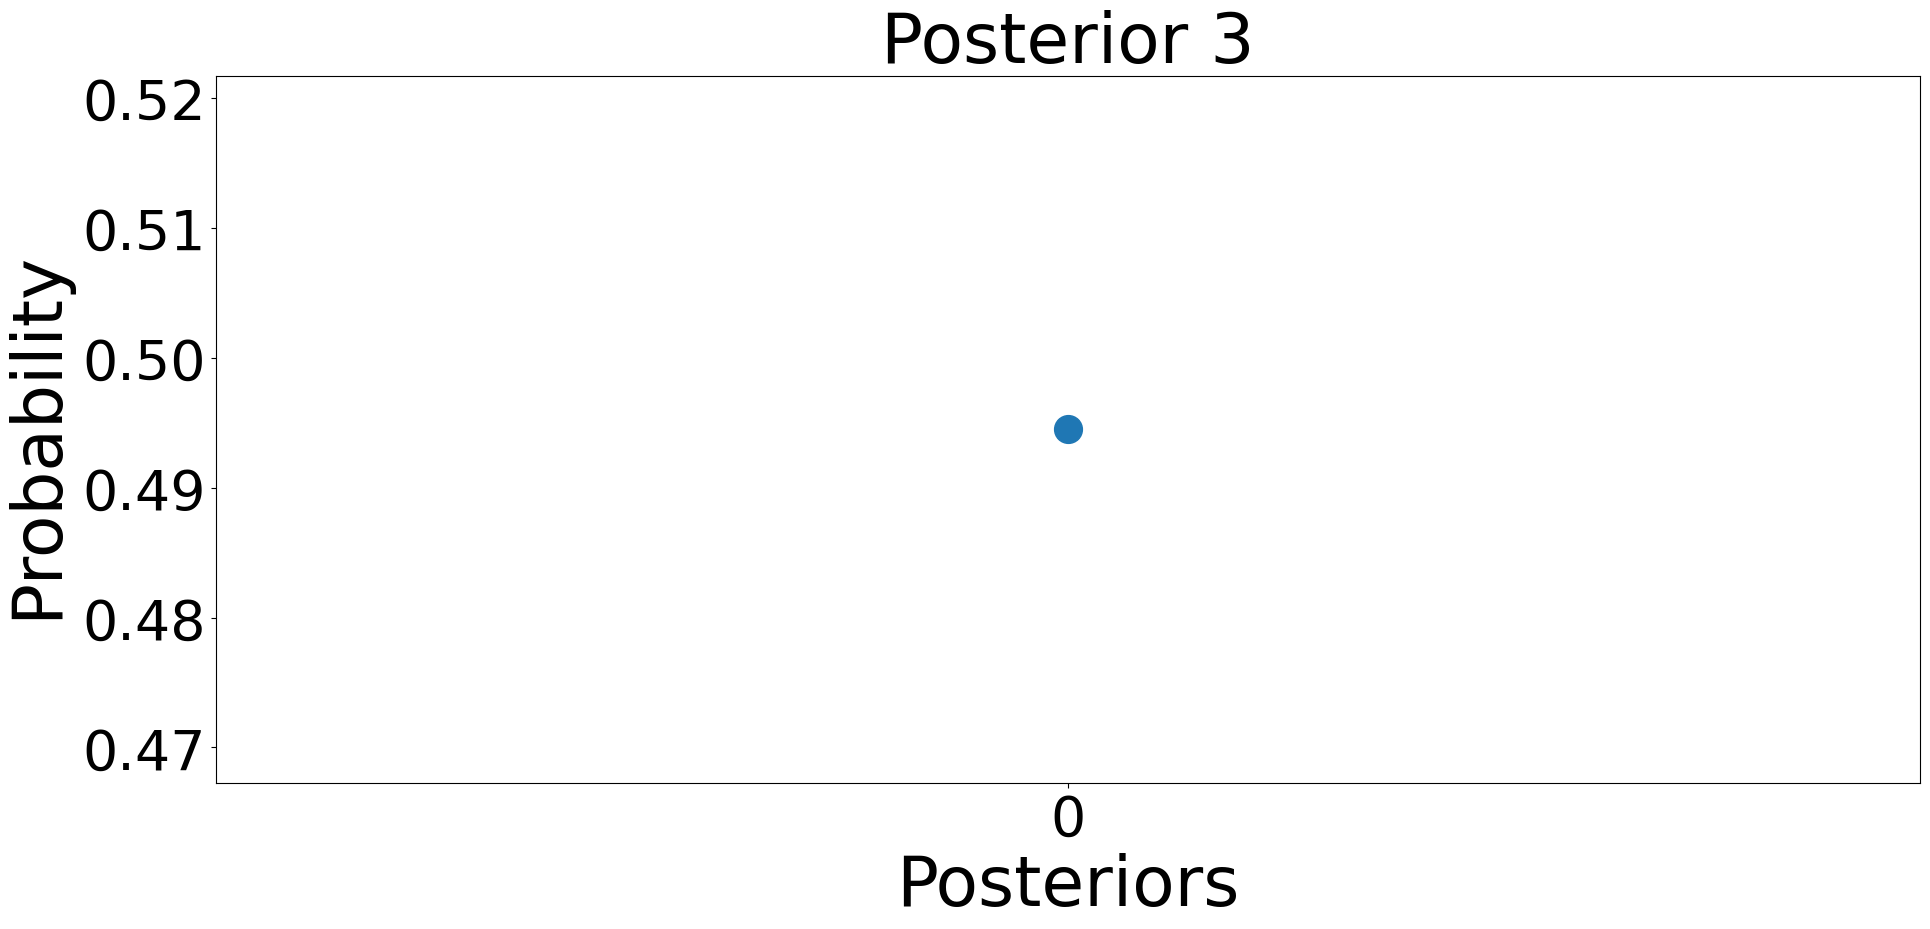

In [10]:
posterior = [posterior3_reshape]
posterior = np.array(posterior)
results, _ = pokie(truth, posterior, num_runs=100)
print(f'Results: {results}')

plot_pokie(results, name='Posterior 3')